Хи^2 Пирсона

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.patches as mpatches
from itertools import product

In [2]:
stats.chisquare([18,55,27],f_exp=[25,50,25])

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

X^2 Cтепень отклонения ожидаемых значений от наблюдаемых 2,62

Вероятность 0,26

Распределение расстояния хи-квадрат 

In [3]:
import random

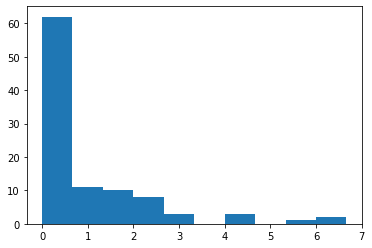

In [4]:
y=[]
for x in range (100):
    x=[]
    for i in range (60):
        x.append(random.randint(0,1))
    
    y.append((x.count(0)-30)**2/30+(x.count(1)-30)**2/30)
plt.hist(y); #гистограмма

###### эмпирическое распределение частот не отличается от равномерного

In [5]:
stats.chisquare(f_obs=[10,10,5,10,10,15], f_exp=[10,10,10,10,10,10])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

Х^2=5

p-уровень значимости 0,415

In [6]:
stats.chisquare([10, 10, 10, 5, 10, 15])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

In [7]:
pvalue=1-stats.chi2.cdf(5,5)
pvalue

0.415880186995508

In [8]:
pvalue=1-stats.chi2.cdf(26.667,2)
pvalue

1.6193268820297035e-06

In [9]:
stats.chisquare([10,30,50])

Power_divergenceResult(statistic=26.666666666666668, pvalue=1.61959679231261e-06)

Х^2=26,666

p-уровень значимости 1.619

p > 0,05 нет оснований отклонить нулевую гипотезу.

In [10]:
pvalue=1-stats.chi2.cdf(5.4,1)
pvalue

0.020136751550346332

In [11]:
stats.chisquare([795,705])

Power_divergenceResult(statistic=5.4, pvalue=0.02013675155034633)

### Дисбаланс классов при расчете ожидаемых частот

In [12]:
x=([10,6],[5,15])
stats.chi2_contingency(x)

(3.715714285714286,
 0.053902557169387154,
 1,
 array([[ 6.66666667,  9.33333333],
        [ 8.33333333, 11.66666667]]))

In [13]:
stats.contingency.expected_freq(x)

array([[ 6.66666667,  9.33333333],
       [ 8.33333333, 11.66666667]])

In [14]:
stats.chi2_contingency(([15, 9], [11, 6]))

(0.0340764831573656,
 0.8535442239746989,
 1,
 array([[15.2195122,  8.7804878],
        [10.7804878,  6.2195122]]))

X^2=0.0340764831573656

p-уровень значимости=0.8535442239746989

In [15]:
stats.chi2_contingency(([20, 15], [11, 12], [7, 9]))

(0.9544070774762996,
 0.6205162173513055,
 2,
 array([[17.97297297, 17.02702703],
        [11.81081081, 11.18918919],
        [ 8.21621622,  7.78378378]]))

In [16]:
stats.chi2_contingency(([18, 7], [6, 13]))

(5.57719298245614,
 0.018195864430772903,
 1,
 array([[13.63636364, 11.36363636],
        [10.36363636,  8.63636364]]))

p-уровень значимости позволяет отклонить 0 гипотезу о том, что нет взаимосвязи между значениями

### В каких ячейках отклоняются наблюдаемые частоты от ожидаемых

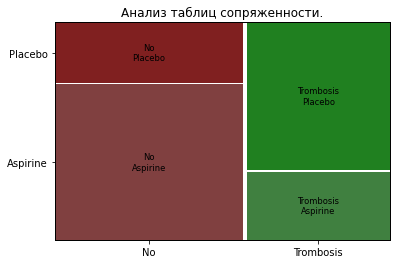

In [17]:
pill_data = {('No', 'Aspirine'): 18,
             ('No', 'Placebo'): 7,
             ('Trombosis', 'Aspirine'): 6,
             ('Trombosis', 'Placebo'): 13,
            }
mosaic(pill_data, gap=0.01, title="Анализ таблиц сопряженности.", );


Вероятность избежать тромбоза значимо выше в группе пациентов, употреблявших небольшие дозы аспирина: 68%, n1=19, чем в контрольной группе пациентов: 28%, n2 = 25,χ^2(1)=5.58,p=0.018

- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке.
- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

In [18]:
def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

In [19]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)

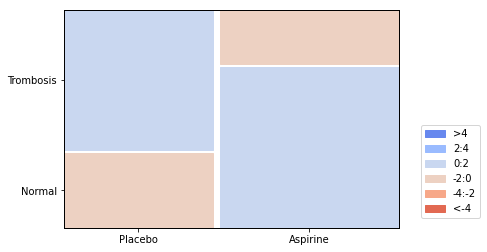

In [20]:
make_me_plot(data)

In [21]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([1, 25, 30, 3], index=idx)

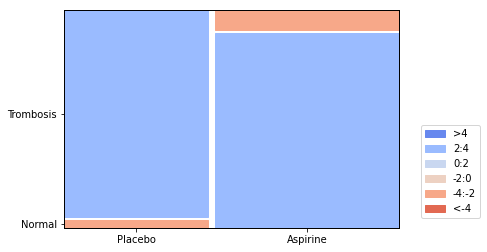

In [22]:
make_me_plot(data)

При анализе четырехпольных таблиц ожидаемые значения в каждой из ячеек должны быть не менее 10. 

В том случае, если хотя бы в одной ячейке ожидаемое явление принимает значение от 5 до 9, критерий хи-квадрат должен рассчитываться с поправкой Йейтса. 

Если хотя бы в одной ячейке ожидаемое явление меньше 5, то для анализа должен использоваться точный критерий Фишера.

В случае анализа многопольных таблиц ожидаемое число наблюдений не должно принимать значения менее 5 более чем в 20% ячеек.

### Точный критерий Фишера

1.Биноминальное распределение Формула Бернулли

2.Отношение факториалов данных для расчета вероятности

In [23]:
# C из формулы Бернулли

import math

def C(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))
C(6,3)

20.0

In [24]:
stats.fisher_exact([[1, 3], [3, 1]])

(0.1111111111111111, 0.48571428571428527)

p_value=0.48571428571428527

In [25]:
stats.fisher_exact([[4, 0], [0, 4]])

(inf, 0.028571428571428536)

## Формула Фишера

In [30]:
# from itertools import combinations
# def C(n, k):
#     return len(list(combinations(range(n), k)))

def C(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

def CF (a, b, c, d):
    n = a + b + c + d
    return C(a + b, a) * C(c + d, c) / C(n, a + c)

In [36]:
test_1=CF(3, 1, 1, 3)
test_2=CF(0, 4, 4, 0)
test_3=CF(4, 0, 0, 4)
test_4=CF(1, 3, 3, 1)

In [40]:
p_value=test_1+test_2+test_3+test_4
p_value

0.48571428571428565

In [ ]:
p уровень значимости не позволяет отклонить 0 гипотезу